# TODO: Task 1 - Approximating Functions

In [2]:
# All imports
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import lstsq
from scipy.spatial.distance import cdist
from utils import*
%reload_ext autoreload
%autoreload 2

# Load datasets with linear and non-linear function data
data_A = np.loadtxt('../../data/linear_function_data.txt')
data_B = np.loadtxt('../../data/nonlinear_function_data.txt')

### TODO: Part 1 - Approximating function in dataset A with a linear function

Text(0.5, 1.0, 'Dataset A visualization')

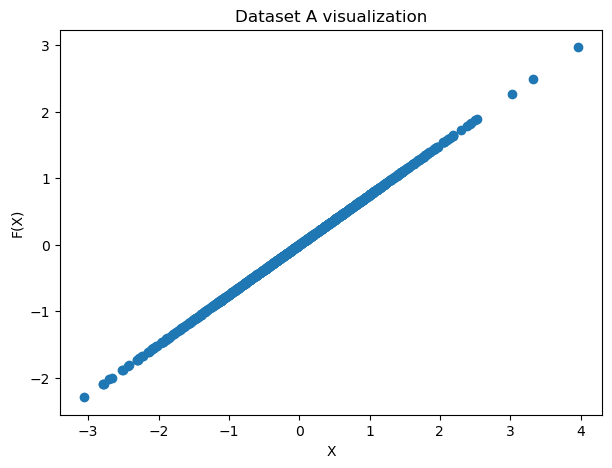

In [3]:
# Plot dataset A
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_A = data_A[:,0][:,np.newaxis]
Y_A = data_A[:,1][:,np.newaxis]

ax.scatter(X_A, Y_A)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Dataset A visualization")

We can observe a clear linear relation between X and Y = F(X). Let's now approximate f with a linear function.

Text(0.5, 1.0, 'Dataset A linear approximation')

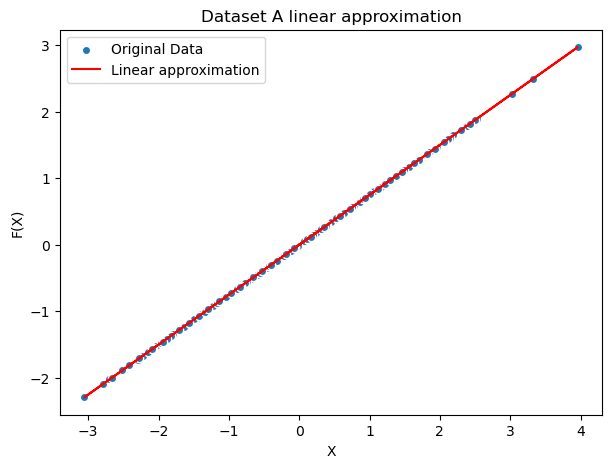

In [4]:
# fit linear model on dataset A and transform X accordingly, plot the results
fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A,label = 'Original Data', edgecolor = 'w')
ax.plot(X_A, linear_fit_transform(X_A,Y_A), label= 'Linear approximation', color = 'r')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Dataset A linear approximation")

In [5]:
# Compute mean squared error
mean_squared_error(Y_A, linear_fit_transform(X_A,Y_A))

1.0611679491269077e-10

The MSE is extremely low (10^-10) and we can see from the graph that the model perfectly fits our observed data. Since we are humans, we can call our model reality and state that the underlying function f in dataset A is a linear function.

### TODO: Part 2 -  Approximating function in dataset B with a linear function

Text(0.5, 1.0, 'Dataset B visualization')

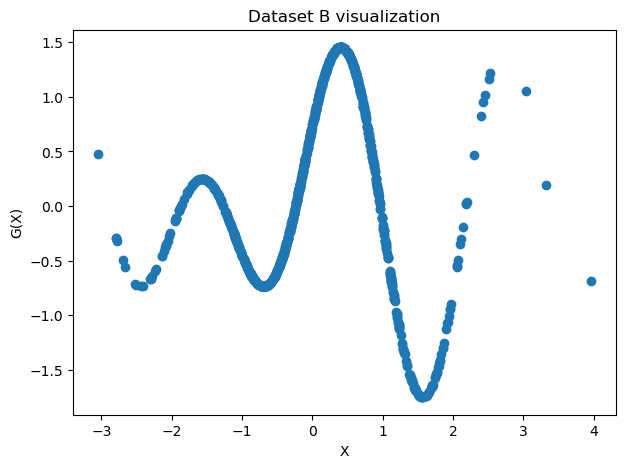

In [12]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_B = data_B[:,0][:,np.newaxis]
Y_B = data_B[:,1][:,np.newaxis]

ax.scatter(X_B, Y_B)
ax.set_xlabel("X")
ax.set_ylabel("G(X)")
ax.set_title("Dataset B visualization")

We can observe a non linear relation between X and Y = G(X). Let's now approximate g with a linear function, which will not be a good fit.

Text(0.5, 1.0, 'Linear function')

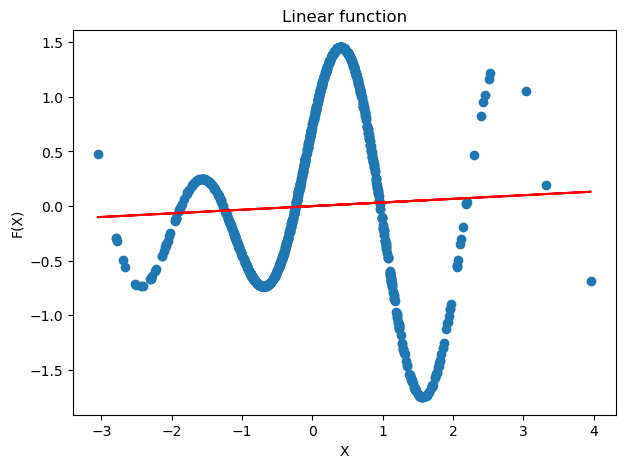

In [13]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.plot(X_B, linear_fit_transform(X_B, Y_B), color = 'r')
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

In [14]:
mean_squared_error(Y_B, linear_fit_transform(X_B, Y_B))

0.7748919879012244

As expected, the linear approximation does not fit the observed data. It is clearly visible from the graph, moreover the MSE is 10^9 times larger than Dataset A linear approximation which confirms intuition: the underlying function g generating Y from X is non linear.

### TODO: Part 3.1 - Approximating function in dataset B with radial basis functions

Text(0.5, 1.0, 'Non Linear function')

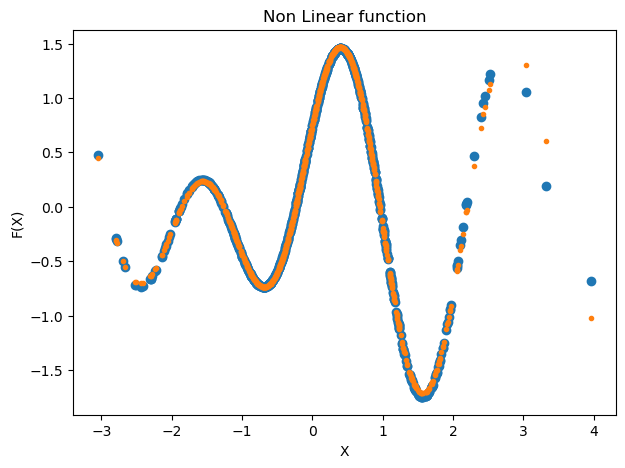

In [76]:
L_B = 100
centers_B = np.linspace(-4.5,4.5,L_B).reshape((L_B,1))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, non_linear_fit_transform(X_B,Y_B, centers_B,0.15), marker= '.', label= 'RBF approximation')
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

In [69]:
mean_squared_error(non_linear_fit_transform(X_B,Y_B,centers_B, 0.15), Y_B)

0.0005910855437728015

Approximation is quite faithful to the data as we can see from the graph, and we have an MSE of 6*10**-4 that is 10**3 times smaller than for the linear approximation. Our non-linear model is a good approximation of reality!

#### Comparison to SciPy implementation
Built in RBF from scipy, just to compare with our own implementation:

Text(0.5, 1.0, 'Non Linear function')

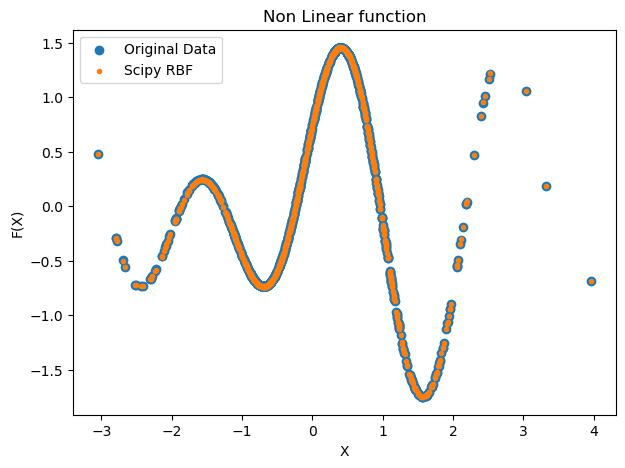

In [73]:
#we cheat with interpolation built-in function
approx_y_cheat = built_int_interpolator(X_B,Y_B,0.9)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, approx_y_cheat, marker= '.', label= 'Scipy RBF')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

In [71]:
mean_squared_error(approx_y_cheat, Y_B)

9.466014586025886e-06

Approximation is perfect however we might have some overfitting here.

### TODO: Part 3.2 - Approximating function in dataset A with radial basis functions (Why is it not a good idea?)"

Text(0.5, 1.0, 'Linear function')

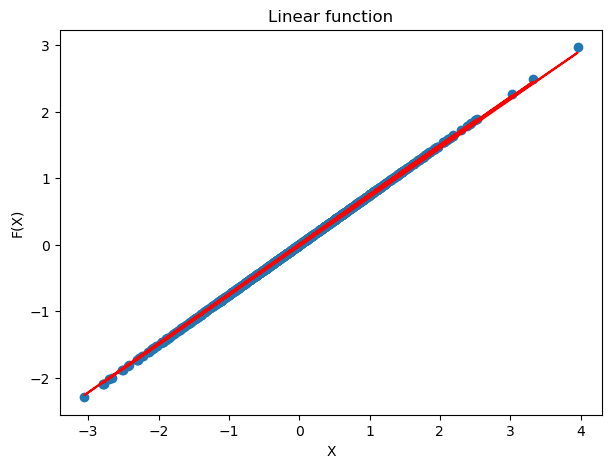

In [88]:
L_A = 100
#phi_x_a = approx_non_linear_function(X_A,L,2)
#approx_y_3 = transform(phi_x_a.T, least_squares(phi_x_a.T, Y_A))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A)
ax.plot(X_A, non_linear_fit_transform(X_A,Y_A,centers_B, 3), color ='r')
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

In [86]:
mean_squared_error(Y_A, non_linear_fit_transform(X_A,Y_A,centers_B,3))

2.031034113849716e-05

We can see from the graph that we have a very good approximation of f even with non linear model! However it is not a good idea for several reason: first, we can see that even though we have a very small error, it is still 10^5 larger than the linear model error! Linear approximation is objectively better, even though the non linear approximation looks satisfying visually. Second, we are wasting computational time calculating L non-linear functions, and then doing a linear approximation when we simply can apply the OLS to the raw data. Linear model is faster, more efficient, more accurate, and simply more intuitive when we see the raw data: Y is clearly linearly correlated to X!